In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install sqlalchemy pymysql pandas matplotlib seaborn
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00


In [3]:
import psutil
print(f"Memory available: {psutil.virtual_memory().total / (1024 ** 3):.2f} GB")


Memory available: 12.67 GB


In [4]:
# Database connection parameters
host = 'air-quality-db.c6jid8c0mhxf.us-east-1.rds.amazonaws.com'
port = 3306  # The default port for MySQL
user = 'admin'  # Replace with your actual username
password = 'aqdata.09'  # Consider managing this securely as mentioned
database = 'air_quality'

# Create a connection string using pymysql as the driver for MySQL
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'

# Create a database engine
engine = create_engine(connection_string)

In [5]:
all_data = pd.DataFrame()
for year in range(2020, 2025):
    table_name = f'air_quality_{year}'
    query = f'SELECT *, {year} AS year FROM {table_name}'
    df = pd.read_sql(query, engine)

    # Convert 'time' column to datetime format if not already
    df['time'] = pd.to_datetime(df['time'])

    # Append the yearly data to the all_data DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

<ipython-input-5-1c17c266dca0>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, df], ignore_index=True)
<ipython-input-5-1c17c266dca0>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, df], ignore_index=True)


In [6]:
# Database connection parameters
host = 'air-quality-db.c6jid8c0mhxf.us-east-1.rds.amazonaws.com'
port = 3306  # The default port for MySQL
user = 'admin'  # Replace with your actual username
password = 'aqdata.09'  # Consider managing this securely as mentioned
database = 'traffic_data'

# Create a connection string using pymysql as the driver for MySQL
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'

# Create a database engine
engine = create_engine(connection_string)

In [7]:
table_name = 'traffic_zh'
df_traffic = pd.read_sql(f"SELECT * FROM {table_name}", con=engine)


In [8]:
# Database connection parameters
host = 'air-quality-db.c6jid8c0mhxf.us-east-1.rds.amazonaws.com'
port = 3306  # The default port for MySQL
user = 'admin'  # Replace with your actual username
password = 'aqdata.09'  # Consider managing this securely as mentioned
database = 'fleet_data'

# Create a connection string using pymysql as the driver for MySQL
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'

# Create a database engine
engine = create_engine(connection_string)

In [9]:
table_name = 'df_fleetzh'
df_fleetzh = pd.read_sql(f"SELECT * FROM {table_name}", con=engine)

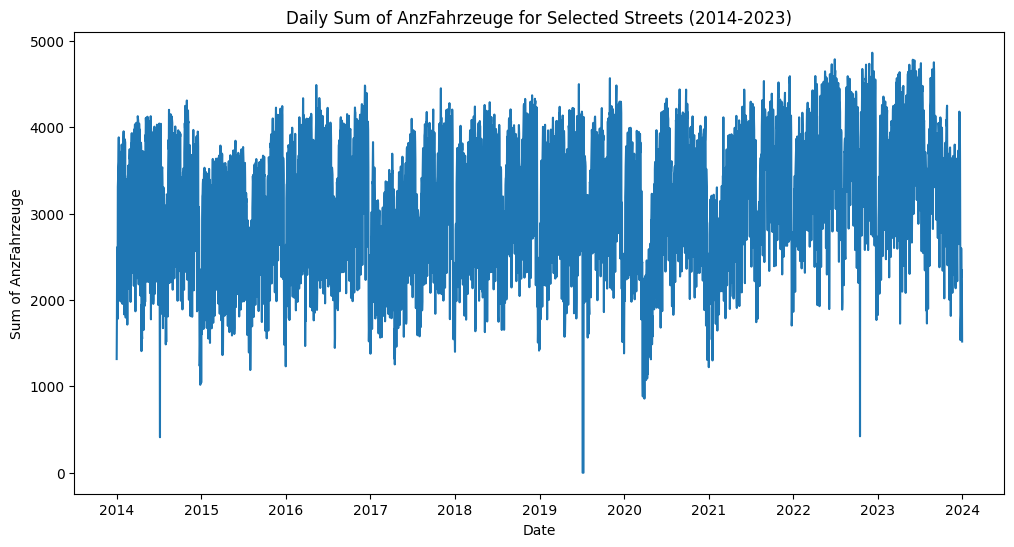

In [46]:
# Group by Date and calculate the sum
daily_sum_filtered = df_traffic.groupby('Date')['AnzFahrzeuge'].sum()

# Plot the daily sum
plt.figure(figsize=(12, 6))
daily_sum_filtered.plot(kind='line', title="Daily Sum of AnzFahrzeuge for Selected Streets (2014-2023)")
plt.xlabel('Date')
plt.ylabel('Sum of AnzFahrzeuge')
plt.grid(False)
plt.show()


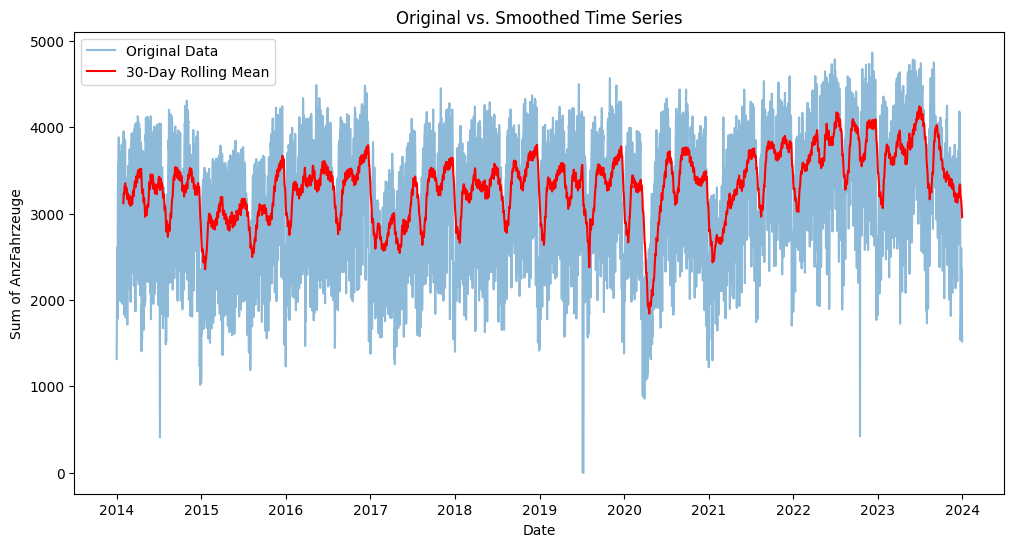

In [47]:
# Apply a rolling mean to smooth the data
rolling_mean = daily_sum_filtered.rolling(window=30).mean()  # 30-day moving average

# Plot original and smoothed data
plt.figure(figsize=(12, 6))
daily_sum_filtered.plot(label='Original Data', alpha=0.5)
rolling_mean.plot(label='30-Day Rolling Mean', color='red')
plt.title('Original vs. Smoothed Time Series')
plt.xlabel('Date')
plt.ylabel('Sum of AnzFahrzeuge')
plt.legend()
plt.grid(False)
plt.show()


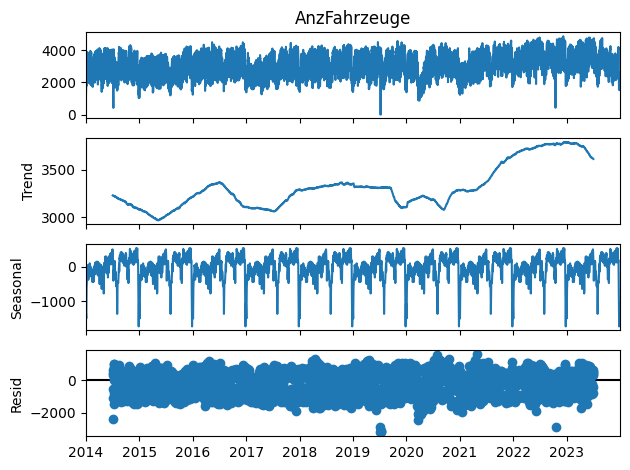

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sum_filtered, model='additive', period=365)

# Plot the decomposition
decomposition.plot()
plt.show()

In [49]:
# Ensure 'Date' is in datetime format
df_traffic['Date'] = pd.to_datetime(df_traffic['Date'], errors='coerce')

# Check for any rows where conversion failed
if df_traffic['Date'].isnull().any():
    print("Some dates could not be converted. Check for invalid date formats.")

# Add 'Month' column
df_traffic['Month'] = df_traffic['Date'].dt.month

Question 03

<ipython-input-50-57103e689350>:19: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(daily_sum_filtered_dropna.index, trend, label='Trend Line', color='red', linestyle='--')


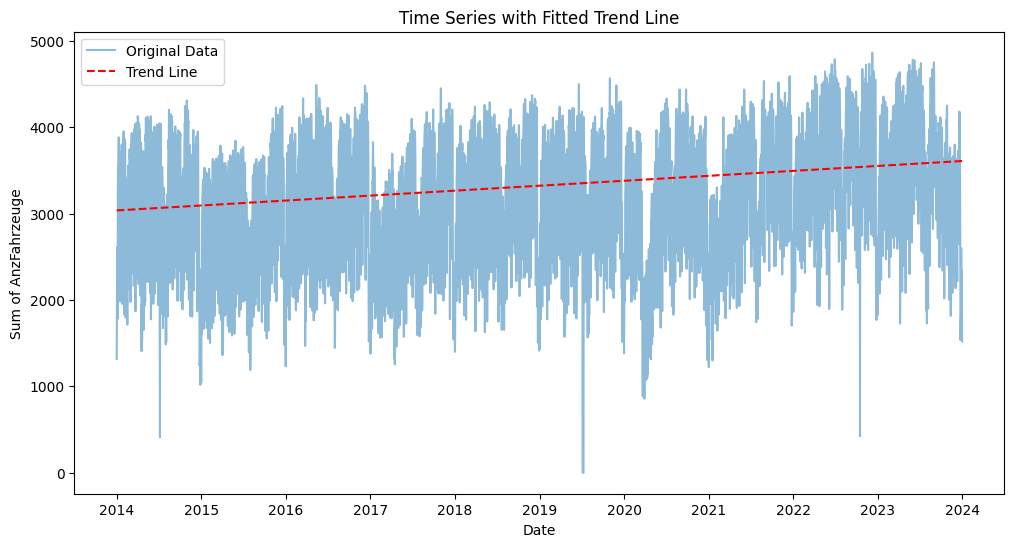

In [50]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
daily_sum_filtered_dropna = daily_sum_filtered.dropna()
X = np.arange(len(daily_sum_filtered_dropna)).reshape(-1, 1)  # Time index as independent variable
y = daily_sum_filtered_dropna.values  # Sum of AnzFahrzeuge

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict trend line
trend = model.predict(X)

# Plot original data and trend line
plt.figure(figsize=(12, 6))
daily_sum_filtered.plot(label='Original Data', alpha=0.5)
plt.plot(daily_sum_filtered_dropna.index, trend, label='Trend Line', color='red', linestyle='--')
plt.title('Time Series with Fitted Trend Line')
plt.xlabel('Date')
plt.ylabel('Sum of AnzFahrzeuge')
plt.legend()
plt.grid(False)
plt.show()


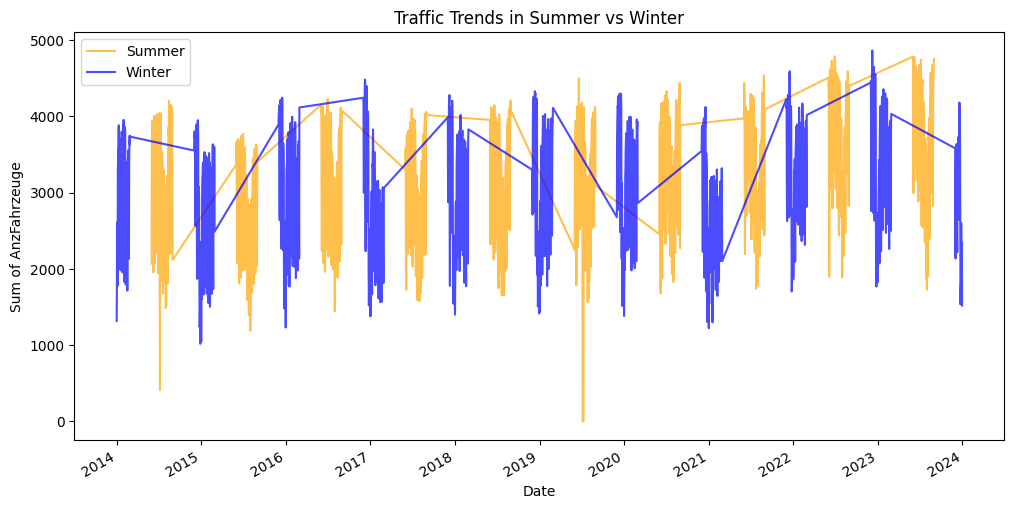

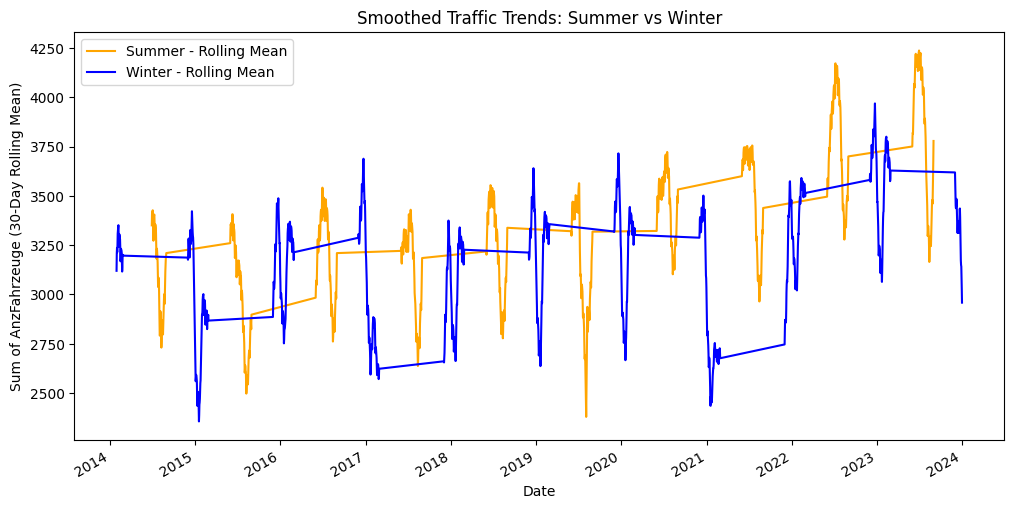

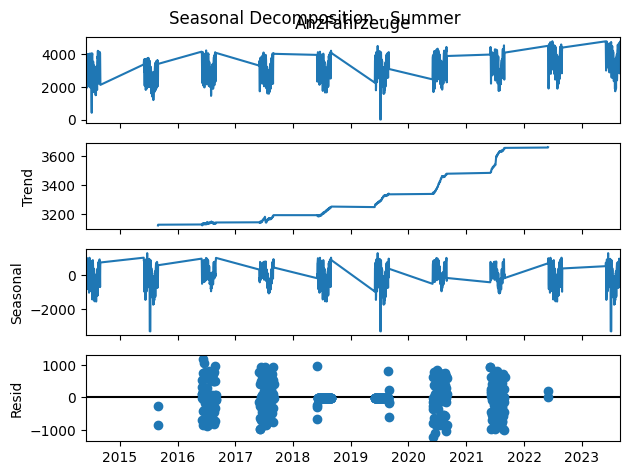

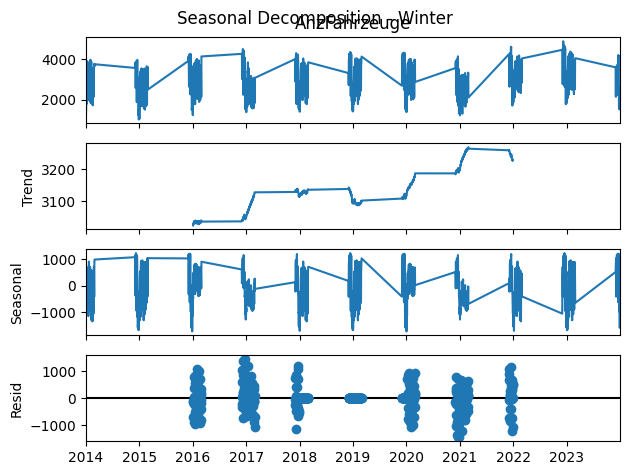

T-test Statistic: 5.346060514565474, P-value: 1.0122279779175197e-07


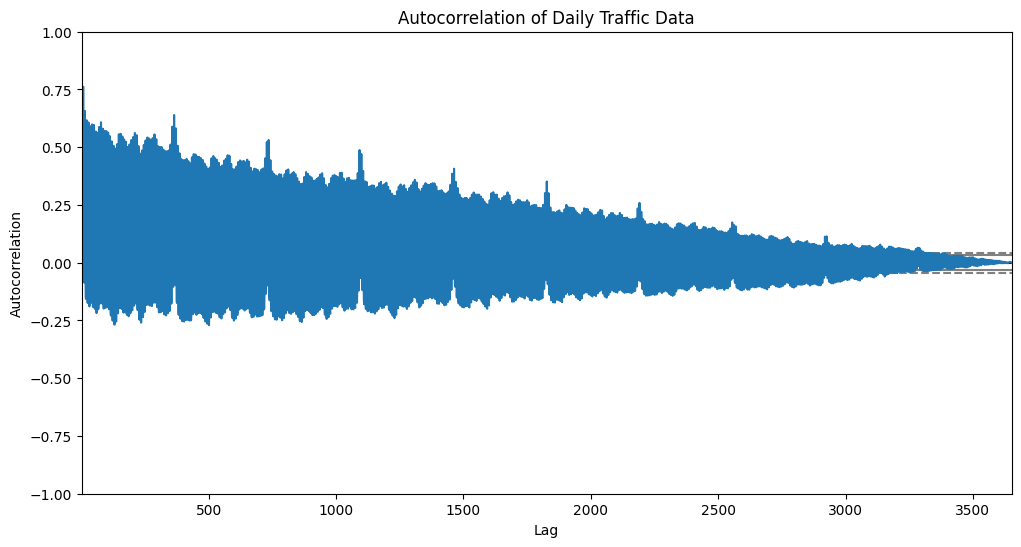

In [51]:
# Add a 'Month' column to group data by month
df_traffic['Month'] = df_traffic['Date'].dt.month

# Filter data for summer (June, July, August) and winter (December, January, February)
summer_data = df_traffic[df_traffic['Month'].isin([6, 7, 8])]
winter_data = df_traffic[df_traffic['Month'].isin([12, 1, 2])]

# Group by date and calculate daily sums for summer and winter
daily_sum_summer = summer_data.groupby('Date')['AnzFahrzeuge'].sum()
daily_sum_winter = winter_data.groupby('Date')['AnzFahrzeuge'].sum()


plt.figure(figsize=(12, 6))
daily_sum_summer.plot(label='Summer', color='orange', alpha=0.7)
daily_sum_winter.plot(label='Winter', color='blue', alpha=0.7)
plt.title('Traffic Trends in Summer vs Winter')
plt.xlabel('Date')
plt.ylabel('Sum of AnzFahrzeuge')
plt.legend()
plt.grid(False)
plt.show()

rolling_mean_summer = daily_sum_summer.rolling(window=30).mean()
rolling_mean_winter = daily_sum_winter.rolling(window=30).mean()

plt.figure(figsize=(12, 6))
rolling_mean_summer.plot(label='Summer - Rolling Mean', color='orange')
rolling_mean_winter.plot(label='Winter - Rolling Mean', color='blue')
plt.title('Smoothed Traffic Trends: Summer vs Winter')
plt.xlabel('Date')
plt.ylabel('Sum of AnzFahrzeuge (30-Day Rolling Mean)')
plt.legend()
plt.grid(False)
plt.show()

decomposition_summer = seasonal_decompose(daily_sum_summer, model='additive', period=365)
decomposition_summer.plot()
plt.suptitle('Seasonal Decomposition - Summer')
plt.show()

decomposition_winter = seasonal_decompose(daily_sum_winter, model='additive', period=365)
decomposition_winter.plot()
plt.suptitle('Seasonal Decomposition - Winter')
plt.show()

from scipy.stats import ttest_ind

# Perform a t-test to compare means
t_stat, p_value = ttest_ind(daily_sum_summer.dropna(), daily_sum_winter.dropna(), equal_var=False)
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 6))
autocorrelation_plot(daily_sum_filtered)
plt.title('Autocorrelation of Daily Traffic Data')
plt.grid(False)
plt.show()




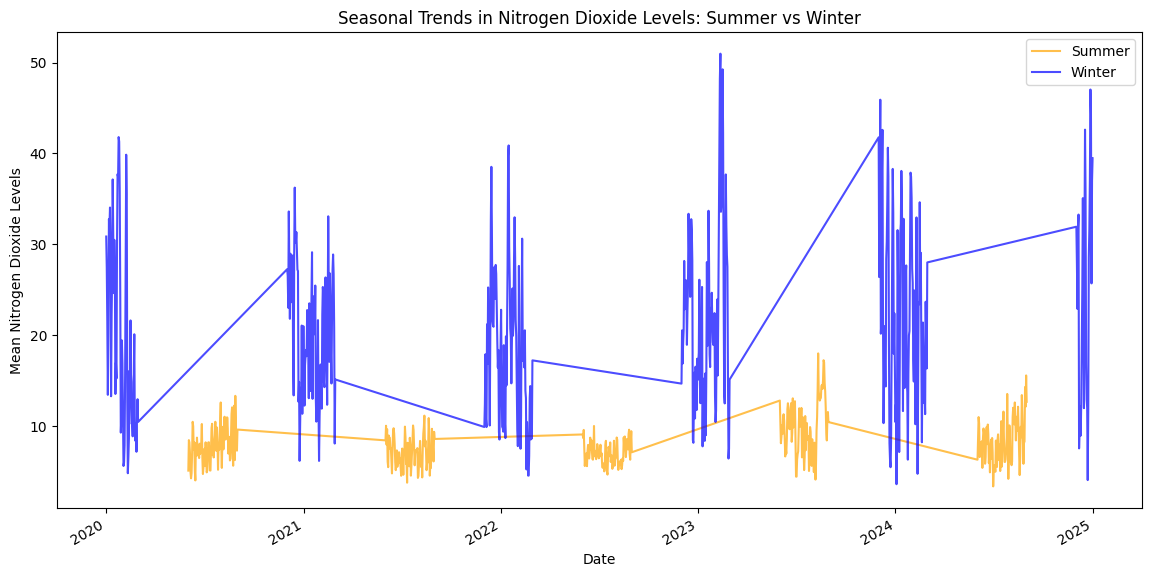

Mean Nitrogen Dioxide Levels in Summer: 8.084338768115943
Mean Nitrogen Dioxide Levels in Winter: 20.828678097345133
T-test Statistic: -27.749121929520165
P-value: 8.377739439873645e-104
The difference in nitrogen dioxide levels between summer and winter is statistically significant.


<Figure size 1200x600 with 0 Axes>

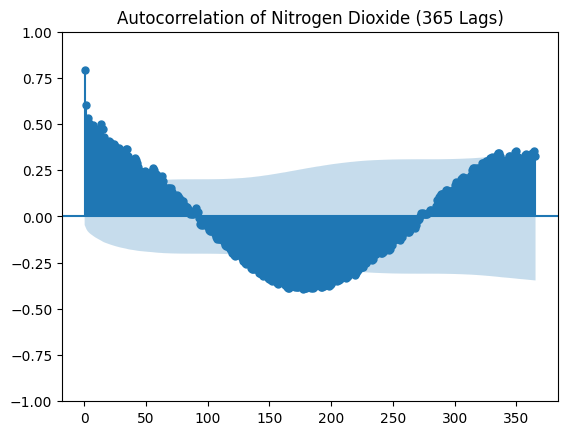

<Figure size 1200x600 with 0 Axes>

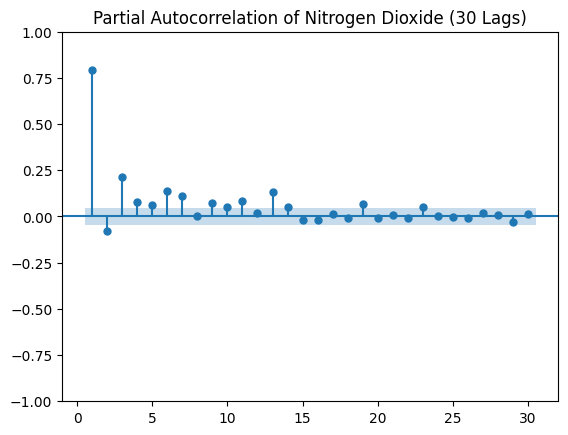

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Group by date and calculate the daily mean of nitrogen dioxide
daily_sum = all_data.groupby('Date')['nitrogen_dioxide'].mean()

# Separate into summer and winter
daily_sum_summer = daily_sum[daily_sum.index.month.isin([6, 7, 8])]
daily_sum_winter = daily_sum[daily_sum.index.month.isin([12, 1, 2])]

# Plot summer and winter data
plt.figure(figsize=(14, 7))
daily_sum_summer.plot(label='Summer', color='orange', alpha=0.7)
daily_sum_winter.plot(label='Winter', color='blue', alpha=0.7)
plt.title('Seasonal Trends in Nitrogen Dioxide Levels: Summer vs Winter')
plt.xlabel('Date')
plt.ylabel('Mean Nitrogen Dioxide Levels')
plt.legend()
plt.grid(False)
plt.show()

# Calculate and compare mean levels
mean_summer = daily_sum_summer.mean()
mean_winter = daily_sum_winter.mean()

print(f"Mean Nitrogen Dioxide Levels in Summer: {mean_summer}")
print(f"Mean Nitrogen Dioxide Levels in Winter: {mean_winter}")

# Perform a t-test
t_stat, p_value = ttest_ind(daily_sum_summer.dropna(), daily_sum_winter.dropna(), equal_var=False)
print(f"T-test Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Evaluate results
if p_value < 0.05:
    print("The difference in nitrogen dioxide levels between summer and winter is statistically significant.")
else:
    print("The difference in nitrogen dioxide levels between summer and winter is not statistically significant.")


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming `all_data` DataFrame is available with `Date` and `nitrogen_dioxide` columns

# Ensure Date column is datetime and set as index
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data.set_index('Date', inplace=True)

# Resample nitrogen dioxide data to daily mean
nitrogen_dioxide_daily = all_data['nitrogen_dioxide'].resample('D').mean()

# Drop NaN values to avoid errors in autocorrelation
nitrogen_dioxide_daily = nitrogen_dioxide_daily.dropna()

# Plot autocorrelation and partial autocorrelation for nitrogen dioxide
plt.figure(figsize=(12, 6))
plot_acf(nitrogen_dioxide_daily, lags=365, title='Autocorrelation of Nitrogen Dioxide (365 Lags)', zero=False)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(nitrogen_dioxide_daily, lags=30, title='Partial Autocorrelation of Nitrogen Dioxide (30 Lags)', zero=False)
plt.show()


In [39]:
all_data

,time,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,...,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,year,Date,Month
0,2020-01-01 00:00:00,25.8,17.3,320.0,NaN,27.0,1.8,4.0,NaN,1.0,...,47.4,8.5,1.44398,0,GMT,GMT,409.0,2020,2020-01-01,1
1,2020-01-01 01:00:00,29.4,25.7,290.0,NaN,28.6,1.3,5.0,NaN,1.0,...,47.4,8.5,1.44398,0,GMT,GMT,409.0,2020,2020-01-01,1
2,2020-01-01 02:00:00,27.5,23.1,337.0,NaN,30.4,1.0,4.0,NaN,1.0,...,47.4,8.5,1.44398,0,GMT,GMT,409.0,2020,2020-01-01,1
3,2020-01-01 03:00:00,23.4,20.5,368.0,NaN,30.2,0.9,4.0,NaN,1.0,...,47.4,8.5,1.44398,0,GMT,GMT,409.0,2020,2020-01-01,1
4,2020-01-01 04:00:00,31.8,20.3,354.0,NaN,31.9,0.8,3.0,NaN,1.0,...,47.4,8.5,1.44398,0,GMT,GMT,409.0,2020,2020-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67315,2024-12-31 19:00:00,17.7,16.3,344.0,505.0,52.8,1.1,8.0,0.08,0.0,...,47.4,8.5,1.76501,0,GMT,GMT,409.0,2024,2024-12-31,12
67316,2024-12-31 20:00:00,18.1,15.6,343.0,506.0,51.6,1.2,5.0,0.08,0.0,...,47.4,8.5,1.76501,0,GMT,GMT,409.0,2024,2024-12-31,12
67317,2024-12-31 21:00:00,19.4,16.6,337.0,506.0,48.4,1.2,3.0,0.08,0.0,...,47.4,8.5,1.76501,0,GMT,GMT,409.0,2024,2024-12-31,12
67318,2024-12-31 22:00:00,20.3,18.0,326.0,504.0,42.4,1.2,3.0,0.08,0.0,...,47.4,8.5,1.76501,0,GMT,GMT,409.0,2024,2024-12-31,12


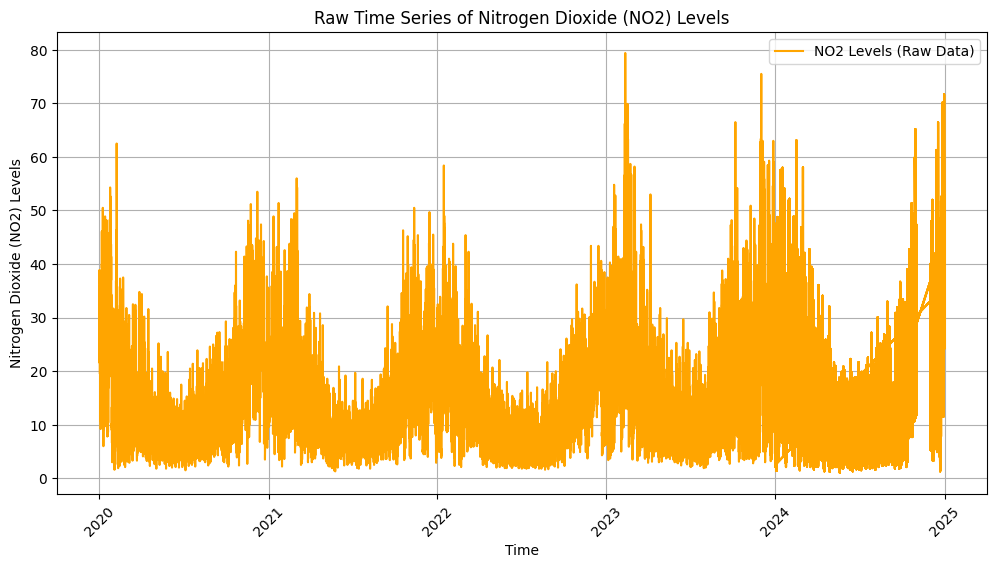

count    67320.000000
mean        13.861393
std         10.290947
min          1.000000
25%          6.500000
50%         10.900000
75%         18.200000
max         79.400000
Name: nitrogen_dioxide, dtype: float64


ValueError: 'Date' is both an index level and a column label, which is ambiguous.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'all_data' and 'df_traffic' are already loaded

# Step 1: Convert 'time' column in all_data and 'MessungDatZeit' in df_filtered to datetime
all_data['time'] = pd.to_datetime(all_data['time'], errors='coerce')
df_traffic['MessungDatZeit'] = pd.to_datetime(df_traffic['MessungDatZeit'], errors='coerce')

# Step 2: Extract the date from the 'time' column in all_data and 'MessungDatZeit' in df_filtered
all_data['Date'] = all_data['time'].dt.date
df_traffic['Date'] = df_traffic['MessungDatZeit'].dt.date

# Step 3: Plot the raw nitrogen dioxide levels before grouping
plt.figure(figsize=(12, 6))
plt.plot(all_data['time'], all_data['nitrogen_dioxide'], color='orange', linestyle='-', label='NO2 Levels (Raw Data)')
plt.xlabel('Time')
plt.ylabel('Nitrogen Dioxide (NO2) Levels')
plt.title('Raw Time Series of Nitrogen Dioxide (NO2) Levels')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Step 4: Check the distribution and summary statistics of NO2 values
print(all_data['nitrogen_dioxide'].describe())  # Check if there are variations in NO2

# Step 5: Aggregate the 'nitrogen_dioxide' and 'AnzFahrzeuge' by date (daily mean and sum)
daily_no2 = all_data.groupby('Date')['nitrogen_dioxide'].mean()  # daily mean of NO2
daily_sum_anzfahrzeuge = df_traffic.groupby('Date')['AnzFahrzeuge'].sum()  # daily sum of AnzFahrzeuge

# Step 6: Merge the two datasets on the Date column
merged_data = pd.merge(daily_no2, daily_sum_anzfahrzeuge, left_index=True, right_index=True, how='inner')

# Step 7: Visualize the time series of both variables after aggregation
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['nitrogen_dioxide'], color='orange', label='NO2 Levels')
plt.plot(merged_data.index, merged_data['AnzFahrzeuge'], color='blue', label='Daily Sum of AnzFahrzeuge')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('NO2 Levels and Daily Sum of AnzFahrzeuge Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<ipython-input-28-53ba052e7044>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['NO2_rolling_mean'] = all_data_filtered['nitrogen_dioxide'].rolling(window=7, min_periods=1).mean()


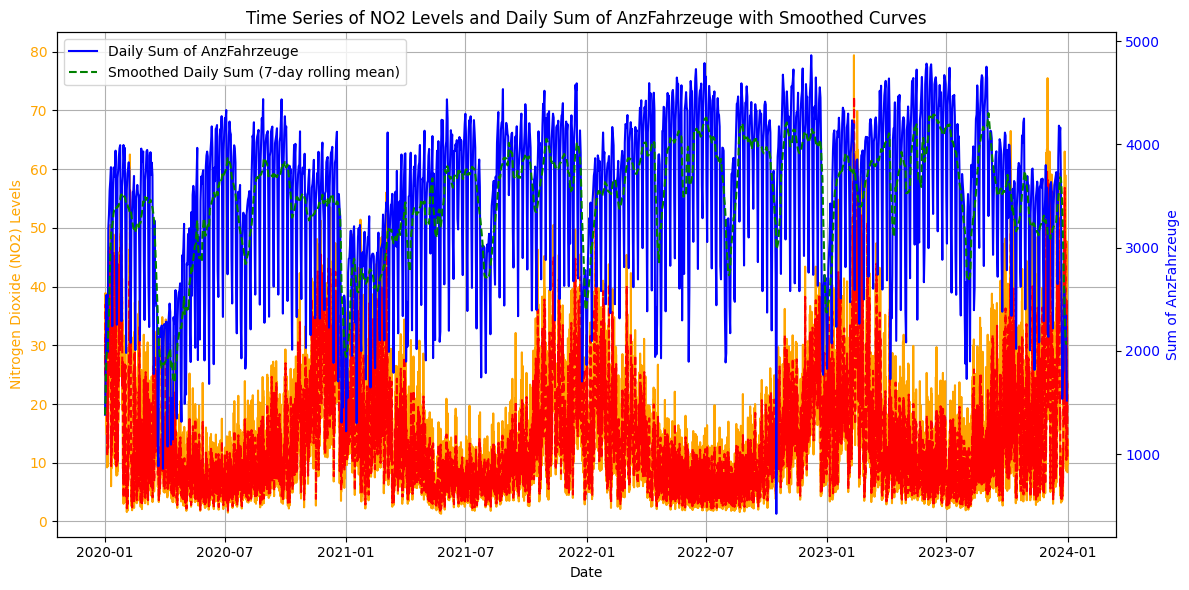

In [28]:

# Convert 'time' column in all_data to datetime
all_data['time'] = pd.to_datetime(all_data['time'], errors='coerce')

# Filter out rows with missing values for time and NO2
all_data = all_data.dropna(subset=['time', 'nitrogen_dioxide'])

# Convert 'MessungDatZeit' column in df_filtered to datetime
df_traffic['MessungDatZeit'] = pd.to_datetime(df_traffic['MessungDatZeit'], errors='coerce')

# Extract the date and group by it in df_filtered
df_traffic['Date'] = df_traffic['MessungDatZeit'].dt.date

# Group by Date and calculate the sum in df_filtered
daily_sum_filtered = df_traffic.groupby('Date')['AnzFahrzeuge'].sum()

# Filter the date range to match between both datasets
start_date = max(all_data['time'].min(), df_traffic['MessungDatZeit'].min())
end_date = min(all_data['time'].max(), df_traffic['MessungDatZeit'].max())

all_data_filtered = all_data[(all_data['time'] >= start_date) & (all_data['time'] <= end_date)]
daily_sum_filtered = daily_sum_filtered[(daily_sum_filtered.index >= start_date.date()) & (daily_sum_filtered.index <= end_date.date())]

# Calculate rolling mean for smoothing the curves (e.g., window size 7 days)
all_data_filtered['NO2_rolling_mean'] = all_data_filtered['nitrogen_dioxide'].rolling(window=7, min_periods=1).mean()
daily_sum_filtered_rolling = daily_sum_filtered.rolling(window=7, min_periods=1).mean()

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the time series of nitrogen dioxide (NO2) levels on the first y-axis
ax1.plot(all_data_filtered['time'], all_data_filtered['nitrogen_dioxide'], color='orange', linestyle='-', label='NO2 Levels')
ax1.plot(all_data_filtered['time'], all_data_filtered['NO2_rolling_mean'], color='red', linestyle='--', label='Smoothed NO2 (7-day rolling mean)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nitrogen Dioxide (NO2) Levels', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the daily sum of AnzFahrzeuge
ax2 = ax1.twinx()
ax2.plot(daily_sum_filtered.index, daily_sum_filtered.values, color='blue', linestyle='-', label='Daily Sum of AnzFahrzeuge')
ax2.plot(daily_sum_filtered.index, daily_sum_filtered_rolling, color='green', linestyle='--', label='Smoothed Daily Sum (7-day rolling mean)')
ax2.set_ylabel('Sum of AnzFahrzeuge', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set titles and grid
plt.title('Time Series of NO2 Levels and Daily Sum of AnzFahrzeuge with Smoothed Curves')
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.legend(loc='best')
plt.show()


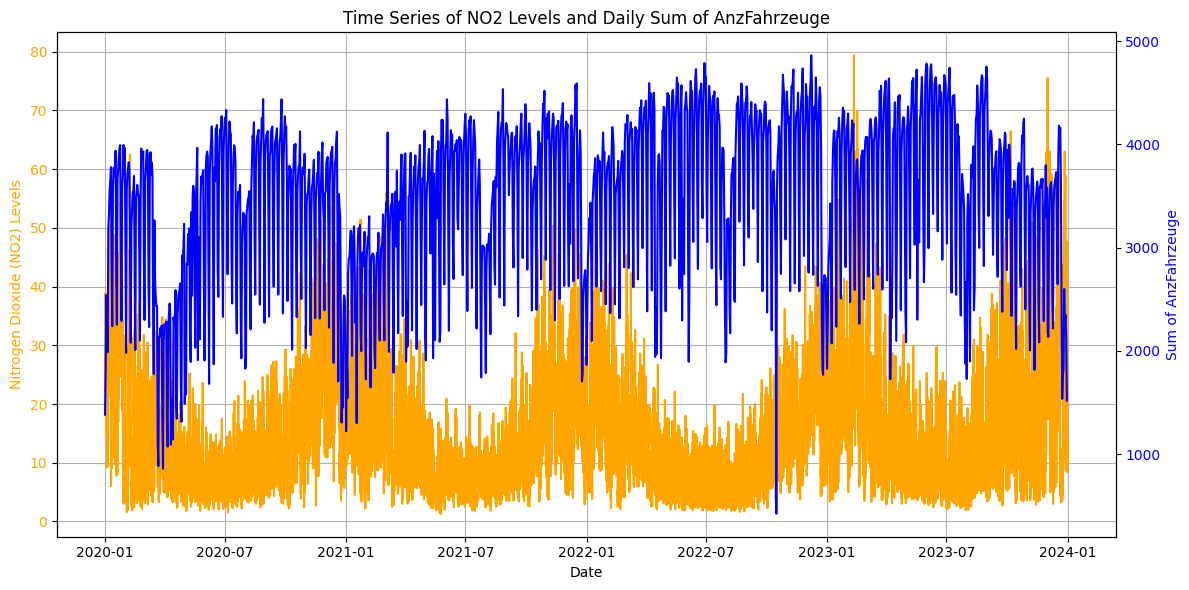

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is already loaded as 'all_data' and 'df_filtered'

# Convert 'time' column in all_data to datetime
all_data['time'] = pd.to_datetime(all_data['time'], errors='coerce')

# Filter out rows with missing values for time and NO2
all_data = all_data.dropna(subset=['time', 'nitrogen_dioxide'])

# Convert 'MessungDatZeit' column in df_filtered to datetime
df_traffic['MessungDatZeit'] = pd.to_datetime(df_traffic['MessungDatZeit'], errors='coerce')

# Extract the date and group by it in df_filtered
df_traffic['Date'] = df_traffic['MessungDatZeit'].dt.date

# Group by Date and calculate the sum in df_filtered
daily_sum_filtered = df_traffic.groupby('Date')['AnzFahrzeuge'].sum()

# Filter the date range to match between both datasets
start_date = max(all_data['time'].min(), df_traffic['MessungDatZeit'].min())
end_date = min(all_data['time'].max(), df_traffic['MessungDatZeit'].max())

all_data_filtered = all_data[(all_data['time'] >= start_date) & (all_data['time'] <= end_date)]
daily_sum_filtered = daily_sum_filtered[(daily_sum_filtered.index >= start_date.date()) & (daily_sum_filtered.index <= end_date.date())]

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the time series of nitrogen dioxide (NO2) levels on the first y-axis
ax1.plot(all_data_filtered['time'], all_data_filtered['nitrogen_dioxide'], color='orange', linestyle='-', label='NO2 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nitrogen Dioxide (NO2) Levels', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the daily sum of AnzFahrzeuge
ax2 = ax1.twinx()
ax2.plot(daily_sum_filtered.index, daily_sum_filtered.values, color='blue', linestyle='-', label='Daily Sum of AnzFahrzeuge')
ax2.set_ylabel('Sum of AnzFahrzeuge', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set titles and grid
plt.title('Time Series of NO2 Levels and Daily Sum of AnzFahrzeuge')
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Fleet analysis

Question 01

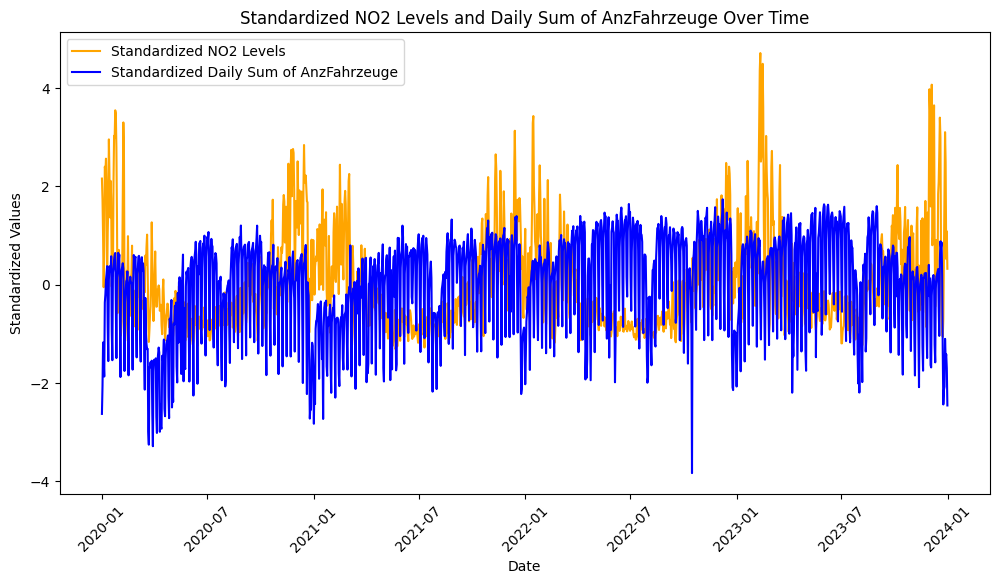

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling to both columns
merged_data[['nitrogen_dioxide_scaled', 'AnzFahrzeuge_scaled']] = scaler.fit_transform(
    merged_data[['nitrogen_dioxide', 'AnzFahrzeuge']]
)

# Plot the standardized data
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['nitrogen_dioxide_scaled'], color='orange', label='Standardized NO2 Levels')
plt.plot(merged_data.index, merged_data['AnzFahrzeuge_scaled'], color='blue', label='Standardized Daily Sum of AnzFahrzeuge')
plt.xlabel('Date')
plt.ylabel('Standardized Values')
plt.title('Standardized NO2 Levels and Daily Sum of AnzFahrzeuge Over Time')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()


Fleet analysis

                Total Value  YOY Increase (%)
INDIKATOR_JAHR                               
2002                 605772               NaN
2003                 609746          0.656022
2004                 618524          1.439616
2005                 623008          0.724952
2006                 628057          0.810423
2007                 634982          1.102607
2008                 642078          1.117512
2009                 648796          1.046290
2010                 657425          1.330002
2011                 668873          1.741339
2012                 681817          1.935195
2013                 690256          1.237722
2014                 695135          0.706839
2015                 705814          1.536248
2016                 713600          1.103123
2017                 718209          0.645880
2018                 720843          0.366746
2019                 723462          0.363325
2020                 729057          0.773365
2021                 736669       

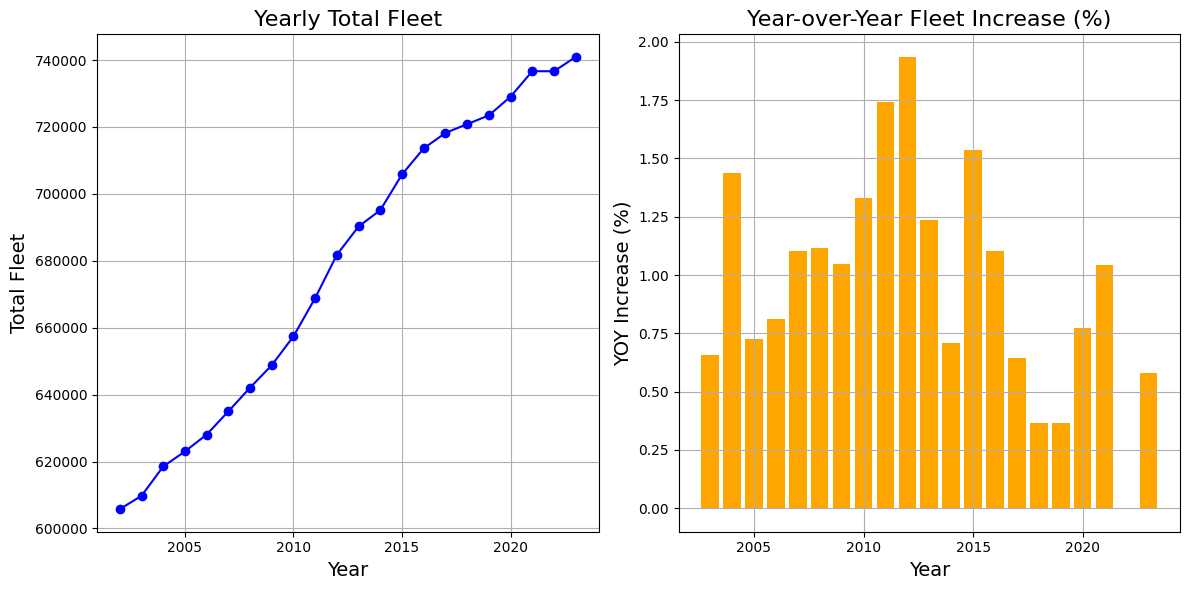

In [18]:


# Group by Year and sum INDIKATOR_VALUE
yearly_indikator = df_fleetzh.groupby('INDIKATOR_JAHR')['INDIKATOR_VALUE'].sum()

# Calculate year-over-year increase
yoy_increase = yearly_indikator.pct_change() * 100  # Convert to percentage

# Combine yearly values and YOY into a DataFrame
yoy_df = pd.DataFrame({
    'Total Value': yearly_indikator,
    'YOY Increase (%)': yoy_increase
})

# Print the DataFrame
print(yoy_df)

# Plot the Yearly Values and YOY Increase
plt.figure(figsize=(12, 6))

# Plot total value
plt.subplot(1, 2, 1)
plt.plot(yearly_indikator.index, yearly_indikator.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Total Fleet', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fleet', fontsize=14)
plt.grid(True)

# Plot YOY increase
plt.subplot(1, 2, 2)
plt.bar(yoy_increase.index, yoy_increase.values, color='orange')
plt.title('Year-over-Year Fleet Increase (%)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('YOY Increase (%)', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

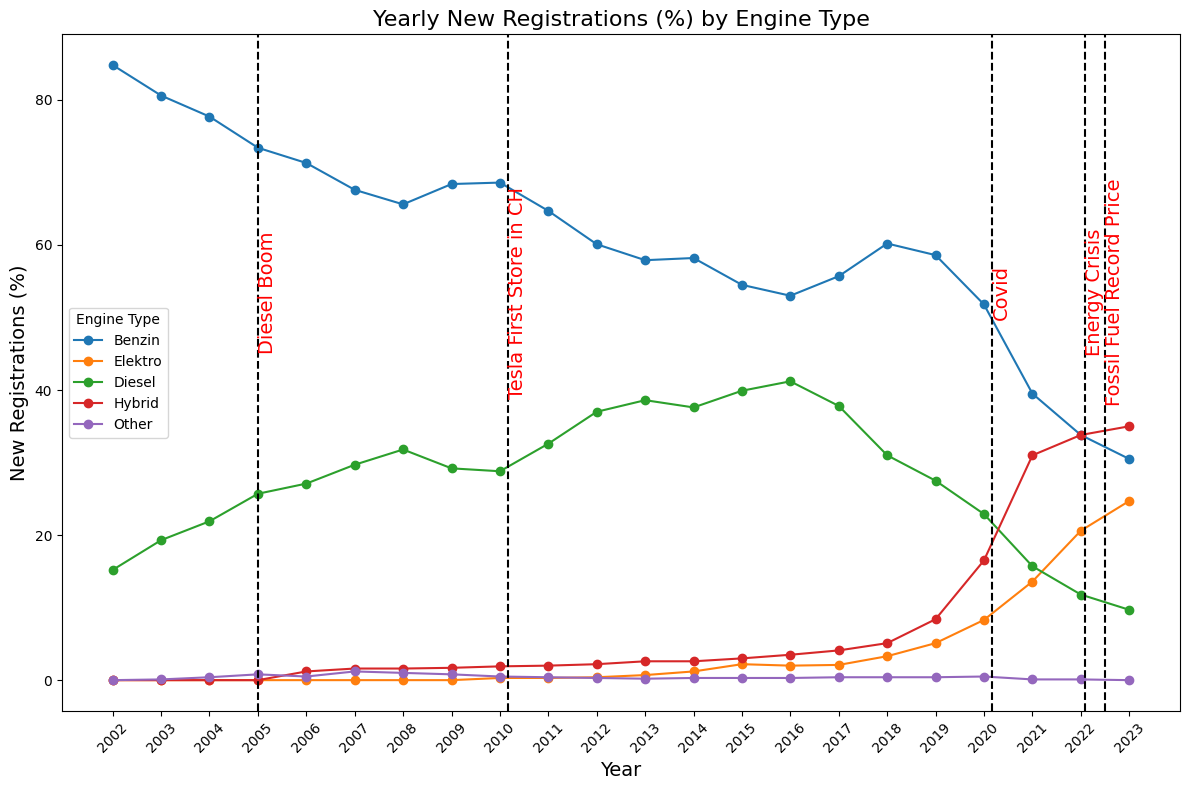

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns for engine types and year (new registrations %)
engine_types_new_reg = [
    'benzin new registrations %',
    'elektro new registrations %',
    'diesel new registrations %',
    'hybrid new registrations %',
    'other new registrations %'
]

fleet_data_new_reg = df_fleetzh[['INDIKATOR_JAHR'] + engine_types_new_reg].copy()

# Convert 'INDIKATOR_JAHR' to a proper datetime format
fleet_data_new_reg['INDIKATOR_JAHR'] = pd.to_datetime(fleet_data_new_reg['INDIKATOR_JAHR'], format='%Y')

# Plot the actual values for each engine type
plt.figure(figsize=(12, 8))
for engine in engine_types_new_reg:
    plt.plot(
        fleet_data_new_reg['INDIKATOR_JAHR'],
        fleet_data_new_reg[engine],
        marker='o',
        label=f'{engine.split()[0].title()}'
    )

# Add vertical lines to mark specific happenings
happenings = {
    pd.Timestamp('2005-01-01'): 'Diesel Boom',
    pd.Timestamp('2010-03-01'): 'Tesla First Store in CH',
    pd.Timestamp('2020-03-01'): 'Covid',
    pd.Timestamp('2022-02-01'): 'Energy Crisis',
    pd.Timestamp('2022-07-01'): 'Fossil Fuel Record Price'
}

for date, event in happenings.items():
    plt.axvline(x=date, color='black', linestyle='--', linewidth=1.5)
    plt.text(date, plt.gca().get_ylim()[1] * 0.6, event, rotation=90,
             color='red', fontsize=14, verticalalignment='center')

# Format x-axis to show only the year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Ensure all years are shown on the x-axis
plt.xticks(fleet_data_new_reg['INDIKATOR_JAHR'], rotation=45)

plt.title('Yearly New Registrations (%) by Engine Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('New Registrations (%)', fontsize=14)
plt.legend(title='Engine Type')
plt.grid(False)
plt.tight_layout()
plt.show()



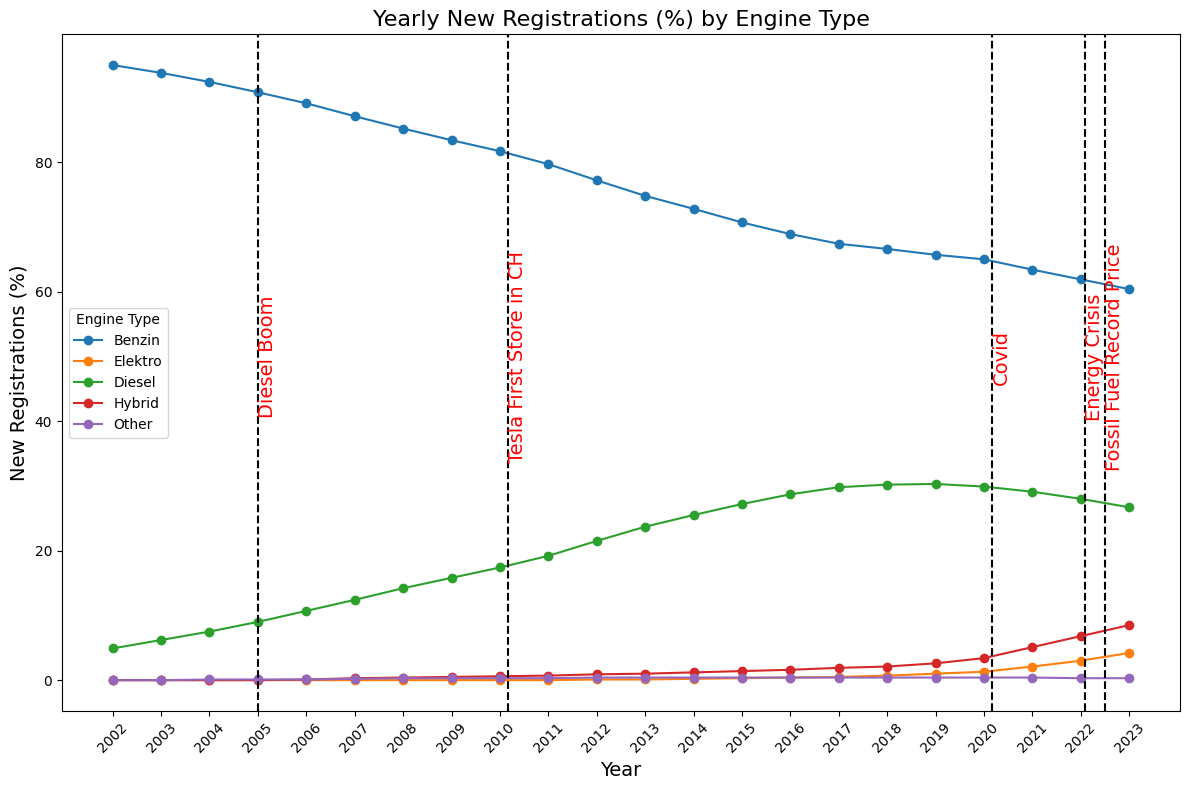

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns for engine types and year (new registrations %)
engine_types_new_reg = [
    'benzin %',
    'elektro %',
    'diesel %',
    'hybrid %',
    'other %'
]

fleet_data_new_reg = df_fleetzh[['INDIKATOR_JAHR'] + engine_types_new_reg].copy()

# Convert 'INDIKATOR_JAHR' to a proper datetime format
fleet_data_new_reg['INDIKATOR_JAHR'] = pd.to_datetime(fleet_data_new_reg['INDIKATOR_JAHR'], format='%Y')

# Plot the actual values for each engine type
plt.figure(figsize=(12, 8))
for engine in engine_types_new_reg:
    plt.plot(
        fleet_data_new_reg['INDIKATOR_JAHR'],
        fleet_data_new_reg[engine],
        marker='o',
        label=f'{engine.split()[0].title()}'
    )

# Add vertical lines to mark specific happenings
happenings = {
    pd.Timestamp('2005-01-01'): 'Diesel Boom',
    pd.Timestamp('2010-03-01'): 'Tesla First Store in CH',
    pd.Timestamp('2020-03-01'): 'Covid',
    pd.Timestamp('2022-02-01'): 'Energy Crisis',
    pd.Timestamp('2022-07-01'): 'Fossil Fuel Record Price'
}

for date, event in happenings.items():
    plt.axvline(x=date, color='black', linestyle='--', linewidth=1.5)
    plt.text(date, plt.gca().get_ylim()[1] * 0.5, event, rotation=90,
             color='red', fontsize=14, verticalalignment='center')

# Format x-axis to show only the year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Ensure all years are shown on the x-axis
plt.xticks(fleet_data_new_reg['INDIKATOR_JAHR'], rotation=45)

plt.title('Yearly New Registrations (%) by Engine Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('New Registrations (%)', fontsize=14)
plt.legend(title='Engine Type')
plt.grid(False)
plt.tight_layout()
plt.show()



Evaluation for benzin new registrations %:
  MAE: 3.04, RMSE: 3.34
Evaluation for elektro new registrations %:
  MAE: 4.60, RMSE: 4.99
Evaluation for diesel new registrations %:
  MAE: 11.97, RMSE: 13.40
Evaluation for hybrid new registrations %:
  MAE: 7.39, RMSE: 8.01
Evaluation for other new registrations %:
  MAE: 0.36, RMSE: 0.50


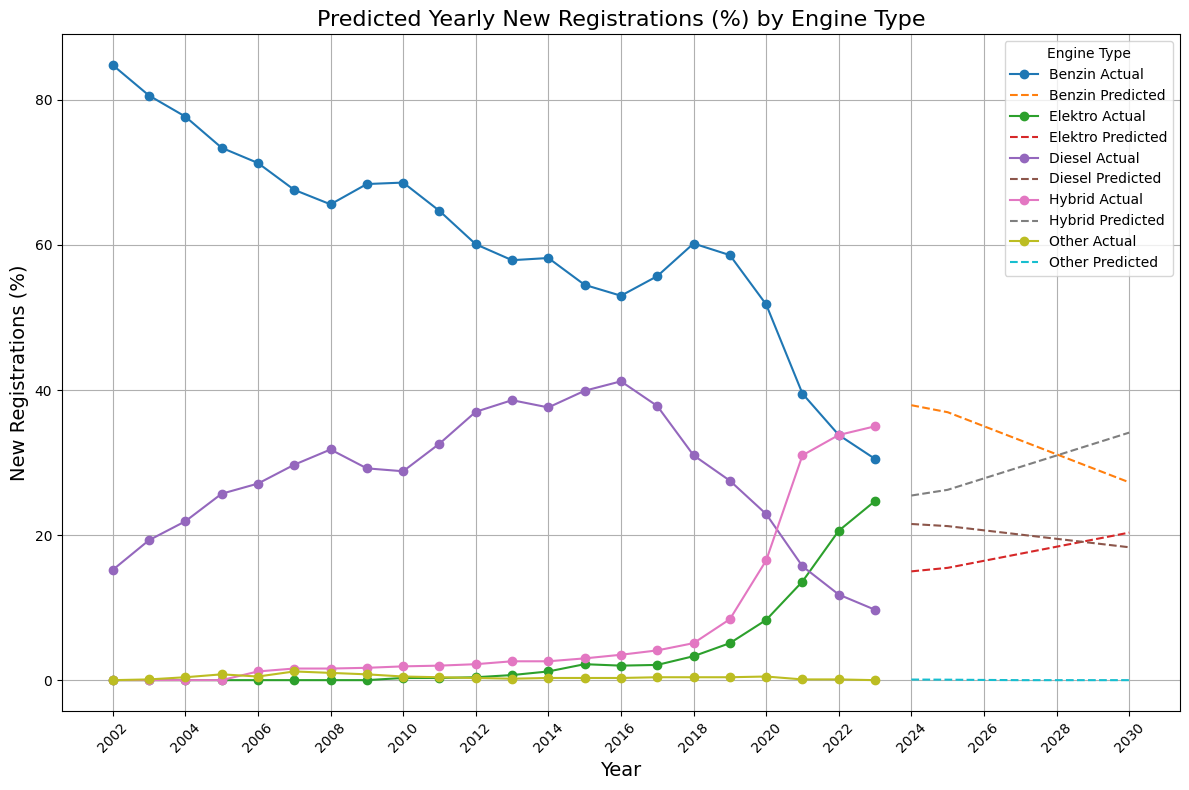

   Year  Predicted %
0  2024    37.906637
1  2025    36.940284
2  2026    35.007577
3  2027    33.074871
4  2028    31.142164
5  2029    29.209458
6  2030    27.276751


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the data
engine_types_new_reg = [
    'benzin new registrations %',
    'elektro new registrations %',
    'diesel new registrations %',
    'hybrid new registrations %',
    'other new registrations %'
]

fleet_data_new_reg = df_fleetzh[['INDIKATOR_JAHR'] + engine_types_new_reg].copy()

# Convert 'INDIKATOR_JAHR' to numeric for regression
fleet_data_new_reg['INDIKATOR_JAHR'] = fleet_data_new_reg['INDIKATOR_JAHR'].astype(int)

# Initialize a dictionary to store predictions and model evaluation results
predictions = {}
evaluation_metrics = {}

# Loop through each engine type and build a model
for engine in engine_types_new_reg:
    # Features (Year) and Target (Engine %)
    X = fleet_data_new_reg[['INDIKATOR_JAHR']].values
    y = fleet_data_new_reg[engine].values

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Polynomial Regression (lower degree)
    poly = PolynomialFeatures(degree=1)  # Linear regression instead of polynomial regression
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_poly_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    evaluation_metrics[engine] = {'MAE': mae, 'RMSE': rmse}

    # Predict future percentages until 2030
    future_years = np.arange(fleet_data_new_reg['INDIKATOR_JAHR'].max() + 1, 2031).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)

    # Apply smoothing to the predictions (simple moving average)
    future_predictions_smoothed = pd.Series(future_predictions).rolling(window=2, min_periods=1).mean().values

    # Apply constraints to keep predictions within the 0-100% range
    future_predictions_smoothed = np.clip(future_predictions_smoothed, 0, 100)

    predictions[engine] = pd.DataFrame({
        'Year': future_years.flatten(),
        'Predicted %': future_predictions_smoothed
    })

    # Print evaluation results
    print(f"Evaluation for {engine}:")
    print(f"  MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot the predictions for all engine types
plt.figure(figsize=(12, 8))
for engine in engine_types_new_reg:
    # Actual values
    plt.plot(
        fleet_data_new_reg['INDIKATOR_JAHR'],
        fleet_data_new_reg[engine],
        marker='o', label=f'{engine.split()[0].title()} Actual'
    )
    # Predicted values
    future_df = predictions[engine]
    plt.plot(
        future_df['Year'],
        future_df['Predicted %'],
        linestyle='--', label=f'{engine.split()[0].title()} Predicted'
    )

# Format x-axis to show years
plt.xticks(np.arange(fleet_data_new_reg['INDIKATOR_JAHR'].min(), 2031, step=2), rotation=45)
plt.title('Predicted Yearly New Registrations (%) by Engine Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('New Registrations (%)', fontsize=14)
plt.legend(title='Engine Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the prediction DataFrame for one example (e.g., 'elektro new registrations %')
print(predictions['benzin new registrations %'])


Cross-Validation RMSE: 4595.71
Test MAE: 8142.60
Test RMSE: 8879.85


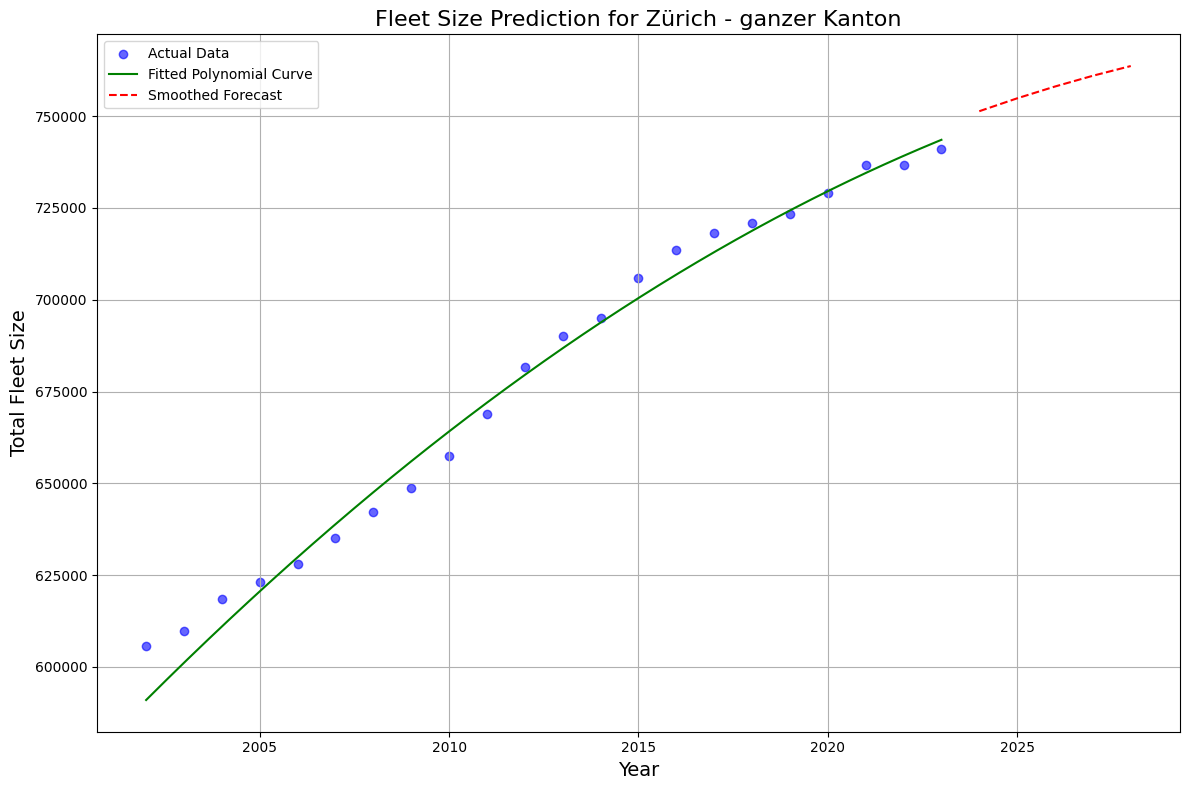

   Year  Predicted Fleet Size
0  2024         747648.172399
1  2025         751446.855863
2  2026         754956.599602
3  2027         758177.403614
4  2028         761109.267900
5  2029         763752.192460
6  2030         766106.177293


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Filter the data
df_fleetzh = df_fleet[df_fleet['GEBIET_NAME'] == "Zürich - ganzer Kanton"]

# Step 2: Prepare the data
df_fleetzh = df_fleetzh[['INDIKATOR_JAHR', 'INDIKATOR_VALUE']]
df_fleetzh = df_fleetzh.dropna()  # Drop missing values

# Features (Year) and Target (Total Fleet Size)
X = df_fleetzh['INDIKATOR_JAHR'].values.reshape(-1, 1)  # Reshape for sklearn
y = df_fleetzh['INDIKATOR_VALUE'].values

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Polynomial Regression (degree 2 for smoother trend)
poly = PolynomialFeatures(degree=2)  # Lower degree to avoid drastic drops
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

# Step 5: Evaluate the model on test data
y_pred = model.predict(X_poly_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

# Step 6: Forecast to 2030
future_years = np.arange(df_fleetzh['INDIKATOR_JAHR'].max() + 1, 2031).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Step 7: Apply Smoothing (e.g., Moving Average)
# Apply a simple moving average to smooth the forecast (window size = 3)
smooth_predictions = np.convolve(future_predictions, np.ones(3)/3, mode='valid')

# Step 8: Plot results with smoothed forecast
plt.figure(figsize=(12, 8))

# Plot actual data
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

# Plot fitted polynomial line
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
plt.plot(X_range, model.predict(X_range_poly), color='green', label='Fitted Polynomial Curve')

# Plot forecasted values
plt.plot(future_years[:len(smooth_predictions)], smooth_predictions, color='red', linestyle='--', label='Smoothed Forecast')

# Customize plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fleet Size', fontsize=14)
plt.title('Fleet Size Prediction for Zürich - ganzer Kanton', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Combine predictions with years for clear output
future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Fleet Size': future_predictions})
print(future_df)
